# Równanie Lotka-Volterra - prey-predator model

Historycznie pierwszym formalnym opisem oddziaływania dwóch populacji w ekosystemie jest model Lotki–Volterry. Dotyczy on układu drapieżnik–ofiara: populacja drapieżników żywi się osobnikami gatunku ofiary.
W projekcie drapieznikami są lisy, a ofiarami króliki. Równanie Lotka-Volterra to układ równań, który opisuje zależności między dwoma gatunkami organizmów w systemie ekologicznym. Równanie to zostało opracowane w 1920 roku przez Alfreda Lotka i Vito Volterra, Jest szeroko stosowane w biologii, aby lepiej zrozumieć dynamikę populacji zwierząt i roślin w ich naturalnym środowisku. W tym projekcie skupimy się na analizie tego równania i jego zastosowaniach w różnych sytuacjach ekologicznych, a także na sposobach jego rozwiązywania i interpretacji wyników.

![FOX](fox-v-rabbit.jpg)

### Postać równania

$$ \frac {dx}{dt} = \alpha x - \beta xy $$
$$ \frac {dx}{dt} = \delta x - \gamma xy $$

- $ \frac{dx}{dt} $ - przyrost populacji królików
- $ \frac{dy}{dt} $ - przyrost populacji lisów
- x - populacja krolików
- y - populacja lisów
- $ \alpha $ - przyrost liczby królików spowodowane małą ilością lisów
- $ \beta $ - śmierć królików z powodu wzrostu liczby lisów
- $ \delta $ - śmierć lisów z powodu braku królików
- $ \gamma $ - przyrost liczby lisów z powodu wzrostu liczby królików

### Fizyczna interpretacja równania

- Populacja królików spozywa nieskończenie wiele pokarmu
- Zmiany w populacjach są proporcjonalne do ich rozmiarów
- Lisy jedzą wyłącznie króliki
- Lisy mają nieskończenie wielki apetyt

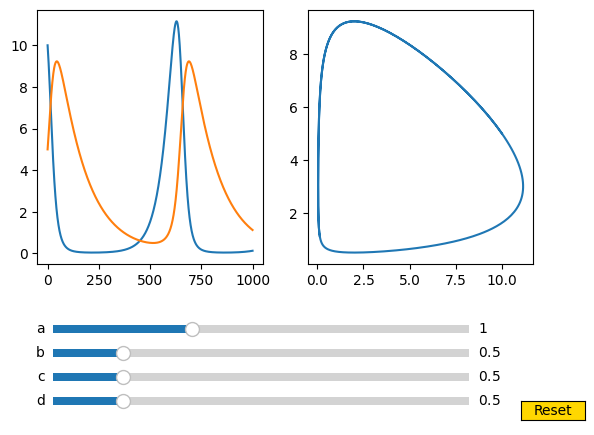

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# from mpl_interactions import ipyplot as iplt

from scipy import integrate

fox = 5
rabbit = 10

t = np.linspace(0, 15, 1000)  # time
X0 = np.array([rabbit, fox])  # initials conditions: 10 rabbits and 5 foxes

# use `c_` instead of `c` because `c` is an argument to plt.scatter

# Create subplots
fig, ax = plt.subplots(1, 2)

# initials conditions
a = 1.5
b = 0.5
c_ = 0.5
d = 0.5

plt.subplots_adjust(bottom=0.35)
# lotka-volttera differential equestion
def f(a, b, c_, d):
    def dX_dt(X, t=0):
        rabbits, foxes = X
        dRabbit_dt = a * rabbits - b * foxes * rabbits
        dFox_dt = -c_ * foxes + d * b * rabbits * foxes
        return [dRabbit_dt, dFox_dt]

    X, legenda = integrate.odeint(dX_dt, X0, t, full_output=True)
    return X  # expects shape (N, 2)


model_calc_result = f(a, b, c_, d)
ax[0].plot(model_calc_result)  # predator and prey population over time
ax[1].plot(
    model_calc_result[:, 0], model_calc_result[:, 1]
)  # phase portrait of the equation


# ax of sliders
ax_a = plt.axes([0.15, 0.2, 0.65, 0.03])
ax_b = plt.axes([0.15, 0.15, 0.65, 0.03])
ax_c = plt.axes([0.15, 0.1, 0.65, 0.03])
ax_d = plt.axes([0.15, 0.05, 0.65, 0.03])

# Sliders
a_slider = Slider(ax=ax_a, label="a", valmin=0, valmax=3, valinit=1)
b_slider = Slider(ax=ax_b, label="b", valmin=0, valmax=3, valinit=0.5)
c_slider = Slider(ax=ax_c, label="c", valmin=0, valmax=3, valinit=0.5)
d_slider = Slider(ax=ax_d, label="d", valmin=0, valmax=3, valinit=0.5)

# a_slider.set_val(a)
# b_slider.set_val(b)
# c_slider.set_val(c_)
# d_slider.set_val(d)


def update(val):
    a = a_slider.val
    b = b_slider.val
    c_ = c_slider.val
    d = d_slider.val

    # phase-diagram
    model_calc_result = f(a, b, c_, d)
    ax[0].clear()
    ax[0].plot(model_calc_result)
    ax[1].clear()
    ax[1].plot(model_calc_result[:, 0], model_calc_result[:, 1])


# main

a_slider.on_changed(update)
b_slider.on_changed(update)
c_slider.on_changed(update)
d_slider.on_changed(update)

# Create axes for reset button and create button
resetax = plt.axes([0.88, 0.025, 0.1, 0.04])
button = Button(resetax, "Reset", color="gold", hovercolor="skyblue")


def resetSlider(event):
    a_slider.reset()
    b_slider.reset()
    c_slider.reset()
    d_slider.reset()
    update(resetax)


# Call resetSlider function when clicked on reset button
button.on_clicked(resetSlider)


plt.show()
# interact(f, 
# a = widgets.FloatSlider(value=1,min=0,max=1,step=0.1), 
# b = widgets.FloatSlider(value=1,min=0,max=1,step=0.1), 
# c = widgets.FloatSlider(value=1,min=0,max=1,step=0.1), 
# d = widgets.FloatSlider(value=1,min=0,max=1,step=0.1))


## Inne równania Lotki-Volterry

Zależność populacji prey-redator to nie jedyny model, który możemy opisać równaniami Lotki-Volterry.
Model prey-predator pozwala na analizę małej części łańcucha pokarmowego, natomiast bardziej generalne układy pozwalają na
analizę szerszych zależności troficznych(ang. food web).
Mniej zgeneralizowaną formą dynamiki gatunków łowca - zwierzyna łowna to konkurencyjne równania Lotki-Volterry
opisujące wiele gatunków konkurujących o jakiś zasób.

### Przykład konkurencyjnego równania Lotki-Volterry
Konkurencyjne równanie Lotki-Volterry w czterowymiarowej przestrzeni fazowej(źródło: https://en.wikipedia.org/)

![Konkurencyjne równanie Lotki-Volterry w czterowymiarowej przestrzeni fazowej][def]

[def]: competitive_lotka_volterra_4_dimentional.png